In [1]:
import requests
import networkx
import time
import collections
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
!pip install pluck
from pluck import pluck, ipluck_single
%matplotlib inline

  Created wheel for pluck: filename=pluck-0.2-cp36-none-any.whl size=4578 sha256=41b2427cf5f697d130c6cec1839e360709425e8b3eef19032ae57fa18353beb2
  Stored in directory: /root/.cache/pip/wheels/52/d9/91/0679ae2cc42907b48c9ec6442e02f0598b563c1a6670b81ebb
Successfully built pluck


In [0]:
my_vk_id = _
my_access_token = '_'

In [0]:
def get_friends_ids(user_id, access_token, needs_token=True):
    add_fields = 'fields=sex,city,education&'
    if needs_token:
        friends_url = f'https://api.vk.com/method/friends.get?{add_fields}user_id={user_id}'\
            f'&access_token={access_token}&v=5.102'
       
    else:
        friends_url = f'https://api.vk.com/method/friends.get?user_id={user_id}'\
            f'&access_token={access_token}&v=5.102'
    json_response = requests.get(friends_url).json()
    if json_response.get('error'):
        return list()
    return json_response[u'response']

In [4]:
get_friends_ids(my_vk_id, my_access_token)

{'count': 244,
 'items': [{'can_access_closed': True,
   'city': {'id': 2, 'title': 'Saint Petersburg'},
   'first_name': 'Viktoria',
   'id': 157133,
   'is_closed': False,
   'last_name': 'Zoltoeva',
   'sex': 1,
   'track_code': 'cc71b31fY5mtXVywjJkNanKjQcMKtxTbINOixObyHkwebDFggNQC-s5tWeDZmA9gdE3pfWPAAKlJ'},
  {'can_access_closed': True,
   'first_name': 'Boris',
   'id': 328497,
   'is_closed': False,
   'last_name': 'Radnaev',
   'sex': 2,
   'track_code': 'f521968dUqK0oiMbHzwbiIoFjVvdTtc1J5I-MsdfMWPkF4L4d_8zwYTCJ0pDOxeHjesl5bQ5w0dO'},
  {'can_access_closed': True,
   'city': {'id': 1, 'title': 'Moscow'},
   'first_name': 'Ksenia',
   'id': 424051,
   'is_closed': False,
   'last_name': 'Komochkova',
   'sex': 1,
   'track_code': '84778e82zoBdjUbUddPdHduZMgX-a16CS6EBoABCQcU0RMhQFqSv42u8QN5w040f33eau5ccSvAi'},
  {'can_access_closed': False,
   'city': {'id': 1, 'title': 'Moscow'},
   'first_name': 'Lena',
   'id': 549977,
   'is_closed': True,
   'last_name': 'Eminova',
   'sex': 1

In [5]:
graph = {}
friends = get_friends_ids(my_vk_id, my_access_token, needs_token=True) 
friend_ids = list(pluck(friends['items'], 'id'))
for friend_id in friend_ids:
    response = get_friends_ids(friend_id, my_access_token, needs_token=False)
    graph[friend_id] = [] if 'items' not in response else response['items']
    print ('Processing id: ', friend_id, len(graph[friend_id]) )

Processing id:  157133 346
Processing id:  328497 321
Processing id:  424051 231
Processing id:  549977 0
Processing id:  557323 1222
Processing id:  590926 504
Processing id:  658222 262
Processing id:  752896 0
Processing id:  970581 257
Processing id:  975760 0
Processing id:  1046377 0
Processing id:  1139223 476
Processing id:  1330338 233
Processing id:  1468424 313
Processing id:  1478725 332
Processing id:  1536623 0
Processing id:  1552936 197
Processing id:  1606277 0
Processing id:  1615840 363
Processing id:  1624838 0
Processing id:  1725698 385
Processing id:  1729483 506
Processing id:  1800764 442
Processing id:  1873621 417
Processing id:  1876999 443
Processing id:  1881857 1333
Processing id:  1901058 286
Processing id:  1955464 561
Processing id:  1970105 546
Processing id:  2187709 303
Processing id:  2194948 0
Processing id:  2236198 271
Processing id:  2478374 714
Processing id:  2653160 207
Processing id:  2672833 555
Processing id:  2683769 0
Processing id:  27

In [0]:
g = networkx.Graph(directed=False)

In [0]:
# соединяем друзей дружащих друг с другом
for i in graph:
    g.add_node(i)
    for j in graph[i]:
        if i != j and i in friend_ids and j in friend_ids:
            g.add_edge(i, j)

In [0]:
# сохраняем
networkx.write_gml(g, "network.gml")

In [0]:
G = nx.read_gml('network.gml')

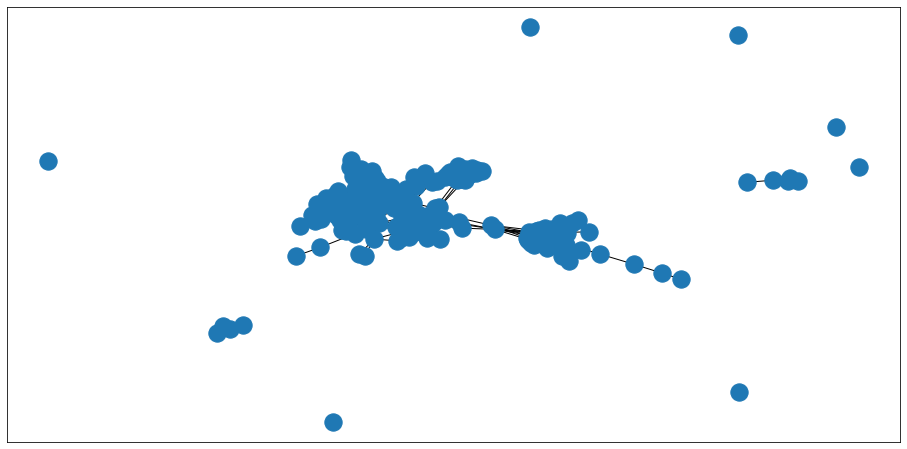

In [10]:
k = nx.degree(G)

plt.figure(1, figsize=(16,8))
coord = nx.spring_layout(G)
nx.draw_networkx(G,
                 pos=coord,
                 font_size=8,
                 cmap=plt.cm.Reds,
                 with_labels=False
                 )

In [11]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.04914659650543075


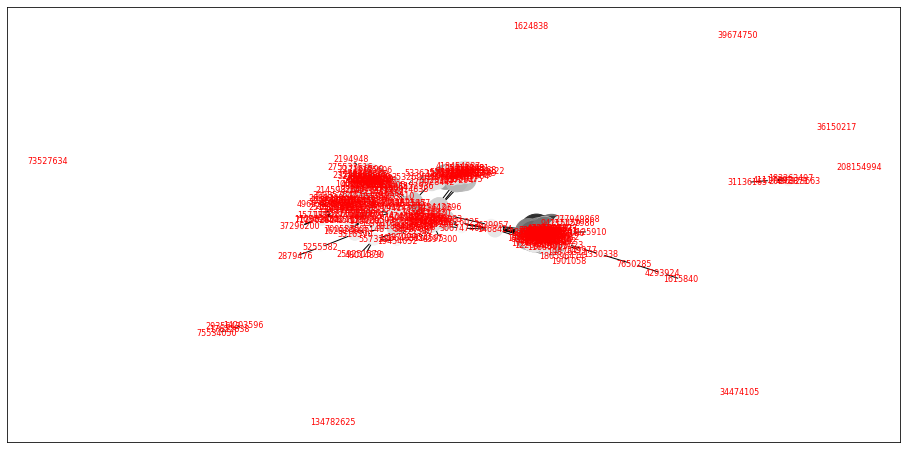

In [32]:
# Degree centrality
dc = nx.degree_centrality(G)
plt.figure(2, figsize=(16,8))
nx.draw_networkx(G,
          pos=coord,
          nodelist=dc.keys(),
          node_size = [d*7000 for d in dc.values()],
          node_color=list(dc.values()),
          font_size=8,
          font_color='red',
          cmap=plt.cm.Greys,
          )

In [0]:
networkx.write_gml(g, "degree_centrality.gml")

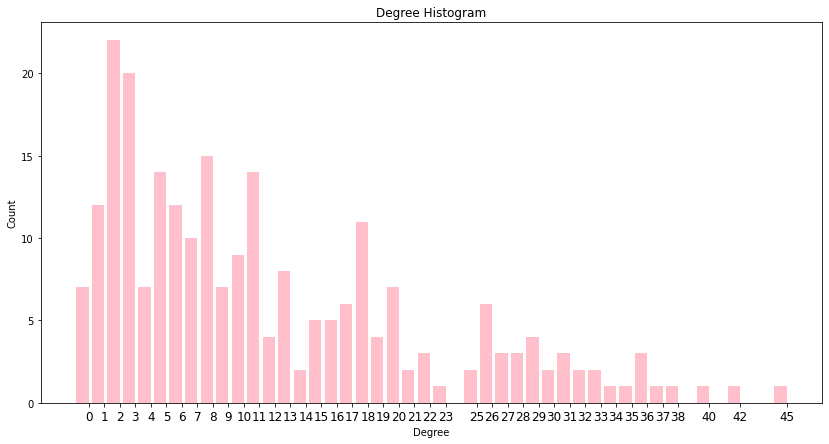

In [62]:
# This figure will be in regular style
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(14,7))
plt.bar(deg, cnt, width=0.8, color='pink')


plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xticks(fontsize=12)
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

In [68]:
d=nx.degree_centrality(G) 
print(d) 

{'157133': 0.01234567901234568, '19483555': 0.04526748971193416, '168096202': 0.02469135802469136, '172382462': 0.020576131687242802, '328497': 0.01234567901234568, '2672833': 0.08230452674897121, '3553176': 0.03292181069958848, '15192361': 0.07407407407407408, '424051': 0.11111111111111112, '970581': 0.12757201646090535, '1046377': 0.10699588477366256, '1468424': 0.03292181069958848, '1800764': 0.13991769547325103, '1876999': 0.14814814814814817, '1955464': 0.08230452674897121, '3294088': 0.11934156378600824, '3720798': 0.11934156378600824, '3847471': 0.12757201646090535, '4857052': 0.11111111111111112, '5764109': 0.1358024691358025, '5867300': 0.11522633744855967, '6018603': 0.15637860082304528, '6021213': 0.17283950617283952, '6591450': 0.13168724279835392, '8883148': 0.14814814814814817, '9932423': 0.13168724279835392, '11952976': 0.1234567901234568, '18121069': 0.10699588477366256, '31955985': 0.16460905349794241, '32250551': 0.1358024691358025, '49292832': 0.1851851851851852, '50

In [67]:
bcG_dict = dict(nx.degree_centrality(G))
ordered_bcGC = sorted(bcG_dict, key = bcG_dict.get,reverse = True)

print("\n top 10 degree centrality connected component:")


for i in range(10):
    print(ordered_bcGC[i])


 top 10 degree centrality connected component:
49292832
6021213
31955985
6018603
90324539
1876999
8883148
4463395
19243810
1800764


In [80]:
c=nx.closeness_centrality(G)
print(c)

{'157133': 0.20448746185379638, '19483555': 0.25986948277253286, '168096202': 0.20547819568060738, '172382462': 0.20488260670762012, '328497': 0.21016203958611182, '2672833': 0.25244464040760334, '3553176': 0.25184500943276344, '15192361': 0.2539562849609423, '424051': 0.24947470346163153, '970581': 0.21269157266036792, '1046377': 0.22776960036776245, '1468424': 0.29008686449026927, '1800764': 0.22875242496481857, '1876999': 0.22924702480258033, '1955464': 0.20995395835879885, '3294088': 0.2275252123845352, '3720798': 0.22703800636229854, '3847471': 0.22801451391654495, '4857052': 0.22703800636229854, '5764109': 0.22875242496481857, '5867300': 0.22655288241707994, '6018603': 0.26440585778352477, '6021213': 0.2307437409601598, '6591450': 0.2275252123845352, '8883148': 0.2294951276432758, '9932423': 0.22703800636229854, '11952976': 0.2515462609043735, '18121069': 0.2715153622821854, '31955985': 0.23124699884665958, '32250551': 0.22924702480258033, '49292832': 0.23251480037542416, '507547

In [79]:
cl_dict = dict(nx.closeness_centrality(G))
ordered_cl = sorted(cl_dict, key = cl_dict.get,reverse = True)

print("\n top 10 closeness centrality connected component:")


for i in range(10):
    print(ordered_cl[i])


 top 10 closeness centrality connected component:
6726382
2746864
20122298
7639957
140049512
1881857
124704385
4846407
3150083
2187709


In [70]:
b=nx.betweenness_centrality(G)
print(b)

{'157133': 0.0, '19483555': 0.035758884201749774, '168096202': 0.004637659880340865, '172382462': 0.003371513433393206, '328497': 0.0, '2672833': 0.008902943818526065, '3553176': 0.014754017355953667, '15192361': 0.006099253058102011, '424051': 0.027077522748507853, '970581': 0.017010381748698216, '1046377': 0.0015929433715986758, '1468424': 0.14849583001105396, '1800764': 0.0020549018749906446, '1876999': 0.008298555350963492, '1955464': 0.001597045082226239, '3294088': 0.0010875477069284896, '3720798': 0.0010166451729561503, '3847471': 0.0013211311239638784, '4857052': 0.0013425290489772672, '5764109': 0.0018989064355640845, '5867300': 0.0006692947005029712, '6018603': 0.08255823425239847, '6021213': 0.005943078087321111, '6591450': 0.001273520074559422, '8883148': 0.003239865776145687, '9932423': 0.0017477636518134641, '11952976': 0.041576007847876066, '18121069': 0.06650049697545667, '31955985': 0.006456064333536779, '32250551': 0.0031038744703618835, '49292832': 0.0110692379947281

In [75]:
bt_dict = dict(nx.betweenness_centrality(G))
ordered_bt = sorted(bt_dict, key = bt_dict.get,reverse = True)

print("\n top 10 betweenness centrality connected component:")


for i in range(10):
    print(ordered_bt[i])


 top 10 betweenness centrality connected component:
6726382
7639957
1468424
3150083
6018603
2746864
140049512
124704385
18121069
3820357


In [95]:
pr = nx.pagerank(G, alpha=0.9)
print(pr)

{'157133': 0.002195566704594482, '19483555': 0.006337231250264613, '168096202': 0.004112567831055774, '172382462': 0.0035504480909828405, '328497': 0.0014952117544930327, '2672833': 0.0068253068312273835, '3553176': 0.004041796307102804, '15192361': 0.006255962201028725, '424051': 0.005450164340483639, '970581': 0.0069759880118438426, '1046377': 0.005317512718916369, '1468424': 0.0027859777628321024, '1800764': 0.006676936247971082, '1876999': 0.007263733135785063, '1955464': 0.0042568212660474315, '3294088': 0.005748787928047718, '3720798': 0.005765762106882117, '3847471': 0.0060799367948579765, '4857052': 0.00542135127282811, '5764109': 0.006547127437932675, '5867300': 0.005519126716634125, '6018603': 0.007497426610555861, '6021213': 0.008239980762556652, '6591450': 0.00623680849318899, '8883148': 0.007168519319264853, '9932423': 0.006292922184023724, '11952976': 0.006114511140113994, '18121069': 0.005407937413153546, '31955985': 0.007922702333324995, '32250551': 0.006688769014477552

In [98]:
pr_dict = dict(nx.pagerank(G))
ordered_pr = sorted(pr_dict, key = pr_dict.get,reverse = True)

print("\n top 10 pagerank connected component:")


for i in range(10):
    print(ordered_pr[i])


 top 10 pagerank connected component:
20122298
40048285
16256455
49292832
19900310
172430510
2187709
140049512
6021213
1873621


In [96]:
r=nx.degree_assortativity_coefficient(G)
print(r)

0.5035366377019016
